# Team Name : 107_095_059
## Nishaan Padanthaya - PES1UG22AM107
## Mohammed Saqlain - PES1UG22AM095
## Fiza Haneen - PES1UG22AM059


# Social Computing Assignment-02

Dataset Used is Amazon Reviews : https://www.kaggle.com/datasets/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones

Note: You can also try out the Restaurant Reviews Dataset https://www.kaggle.com/datasets/joebeachcapital/restaurant-reviews
Account the below in doing so :
  - The Fields are not the same as Amazon reviews
  - The Quantity of reviews are different (10k vs 400k)
  - Part2 requires you to carefully choose your Restaurant from the dataset [Atleast 80+ reviews].
  

In [52]:
from sklearn.svm import LinearSVC
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import SGDClassifier
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Part - 1
### Preprocessing and key phrase extraction

This Segment deals with your Data analysis , deep understanding . After Cleaning the dataset by removing any missing values , you visualize the distributions and get a clearer view on the customer ratings on the Products.

In [53]:

import pandas as pd

file_path = '/kaggle/input/phone-reviews/Amazon_Unlocked_Mobile.csv'

df = pd.read_csv(file_path)

In [54]:
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [55]:
df['Brand Name'].value_counts()[:12]

Brand Name
Samsung        65747
BLU            63248
Apple          58186
LG             22417
BlackBerry     16872
Nokia          16806
Motorola       13417
HTC            12724
CNPGD          12613
OtterBox        7989
Sony            7828
Posh Mobile     6765
Name: count, dtype: int64

In [56]:
df = df[df['Brand Name'] == 'Sony']

In [57]:
df = df[['Brand Name','Rating', 'Reviews']]

In [58]:
df.head()

,Brand Name,Rating,Reviews
258487,Sony,1,Battery never lasted more than a few hours rig...
258575,Sony,5,This is a very stunning looking phone with ver...
277508,Sony,4,Tengo una semana de estar utilizando este telé...
277509,Sony,4,Big and heavy. It is difficult to configure ac...
277510,Sony,2,This is an expensive phone with three major pr...


In [59]:
df.isnull().sum()

Brand Name    0
Rating        0
Reviews       0
dtype: int64

In [60]:
df = df.dropna()

In [61]:
data = df['Rating'].value_counts()

<Axes: xlabel='Rating'>

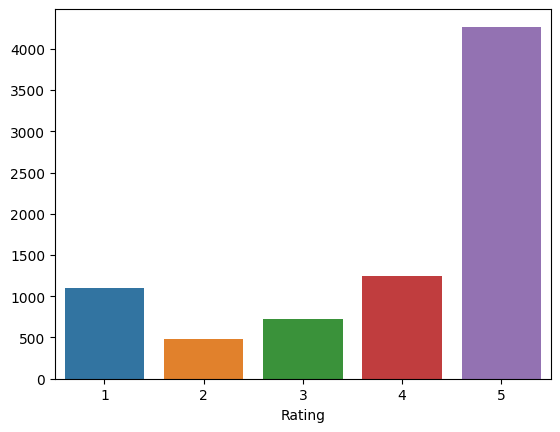

In [62]:
sns.barplot(x=data.index, y=data.values)

## Wordcloud for all the StopWords.


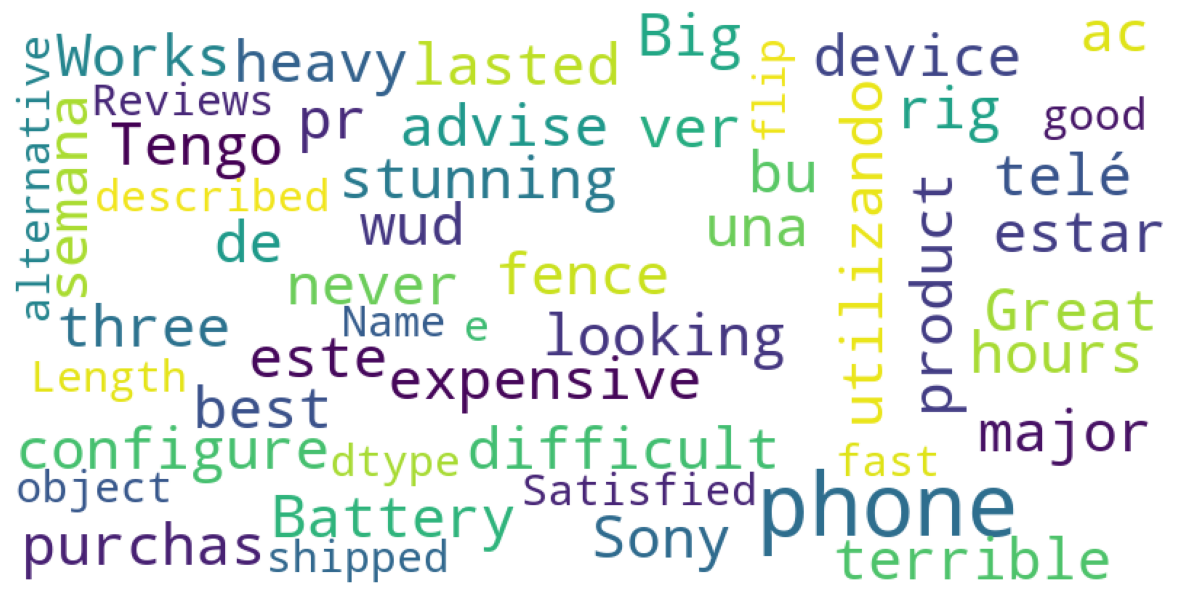

In [63]:
stopwords = set(STOPWORDS)
def wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=250,
        max_font_size=30,
        scale=2,
        random_state=5
        ).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

wordcloud(df['Reviews'])

Explore methods for key word extraction like :

*   TF-IDF
*   TextRank
*   RAKE
*   YAKE
*   Spacy

Use these materials For further information and deep dive into [KeyPhrase Extraction]{https://docs.google.com/presentation/d/1kUvujEGp5zOKuthk_mmJHllSM_NImO6GIt2j4CnjTKQ/edit?usp=drive_link}.

Following is an example of using RAKE on a single data point.

Try any other two and inspect how they work differently under the hood - Your implementation .








In [64]:
 !pip install rake-nltk

In [65]:

import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import spacy
from rake_nltk import Rake

nltk.download('stopwords')
nltk.download('punkt_tab')
nlp = spacy.load("en_core_web_sm")




[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [66]:
# Importing libraries

from wordcloud import WordCloud
import matplotlib.pyplot as plt

rake = Rake()

input_text = df["Reviews"].iloc[0]

# Extracting keywords and phrases
rake.extract_keywords_from_text(input_text)
keywords = rake.get_ranked_phrases()

# Displaying the keywords
print(keywords)


['lot less money', 'battery never lasted', 'hours right', 'first use', 'changing plans', 'better phone', 'got', 'ended']


In [67]:
import spacy
nlp = spacy.load("en_core_web_sm")

def clean_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    # Apply lemmatization using spaCy
    doc = nlp(text)
    lemmatized_text = ' '.join([token.lemma_ for token in doc if token.lemma_ != '-PRON-'])  # Exclude pronouns
    
    return lemmatized_text
df['Cleaned_Reviews'] = df['Reviews'].apply(clean_text)
df

,Brand Name,Rating,Reviews,Cleaned_Reviews
258487,Sony,1,Battery never lasted more than a few hours rig...,battery never last hour right first use end ch...
258575,Sony,5,This is a very stunning looking phone with ver...,stunning look phone nice exclusive app phone v...
277508,Sony,4,Tengo una semana de estar utilizando este telé...,tengo una semana de estar utilizando este telf...
277509,Sony,4,Big and heavy. It is difficult to configure ac...,big heavy difficult configure access web excel...
277510,Sony,2,This is an expensive phone with three major pr...,expensive phone three major problem give twost...
...,...,...,...,...
399612,Sony,5,Sony is The best,sony good
399613,Sony,5,"Great device, I was on the fence about purchas...",great device fence purchase z phone going anno...
399614,Sony,1,this product is terrible ...i wud advise no bu...,product terrible wud advise buyer buy producti...
399615,Sony,4,Works as described and shipped fast. Satisfied.,work describe ship fast satisfied


## Methodology - 01
implment your chosen key phrase extractor below

In [68]:
!pip install yake

In [69]:
import yake
def get_yake_keywords(text, top_n=5):
    kw_extractor = yake.KeywordExtractor()
    keywords = kw_extractor.extract_keywords(text)
    return [word for word, score in keywords[:top_n]]

In [70]:
df.loc[:,'YAKE_Keywords'] = df['Cleaned_Reviews'].apply(lambda x: get_yake_keywords(x))


## Methodology - 02
implment another of key phrase extractor below

In [71]:
# Your code here
def get_spacy_keywords(text):
    doc = nlp(text)
    keywords = [chunk.text for chunk in doc.noun_chunks if len(chunk.text.split()) > 1]
    return keywords[:5]
df.loc[:,'Spacy_Keywords'] = df['Cleaned_Reviews'].apply(lambda x: get_spacy_keywords(x))


In [72]:
df

,Brand Name,Rating,Reviews,Cleaned_Reviews,YAKE_Keywords,Spacy_Keywords
258487,Sony,1,Battery never lasted more than a few hours rig...,battery never last hour right first use end ch...,"[end change plan, lot less money, end change, ...","[right first use end change plan, well phone l..."
258575,Sony,5,This is a very stunning looking phone with ver...,stunning look phone nice exclusive app phone v...,"[nice exclusive app, great put sim, put sim ca...",[stunning look phone nice exclusive app phone ...
277508,Sony,4,Tengo una semana de estar utilizando este telé...,tengo una semana de estar utilizando este telf...,"[pero por las, ellos pero por, pero bueno esta...","[por que, sony ericksson senta muy cmodo con e..."
277509,Sony,4,Big and heavy. It is difficult to configure ac...,big heavy difficult configure access web excel...,"[big heavy difficult, sound screen resolution,...",[big heavy difficult configure access web exce...
277510,Sony,2,This is an expensive phone with three major pr...,expensive phone three major problem give twost...,"[home screen rotate, screen rotate easily, str...","[expensive phone three major problem, twostar ..."
...,...,...,...,...,...,...
399612,Sony,5,Sony is The best,sony good,"[sony good, sony, good]",[sony good]
399613,Sony,5,"Great device, I was on the fence about purchas...",great device fence purchase z phone going anno...,"[device fence purchase, return boy glad, grab ...","[z phone, bad case scenario, phone htc samsung..."
399614,Sony,1,this product is terrible ...i wud advise no bu...,product terrible wud advise buyer buy producti...,"[wud advise buyer, advise buyer buy, buyer buy...","[product terrible wud advise buyer, productit ..."
399615,Sony,4,Works as described and shipped fast. Satisfied.,work describe ship fast satisfied,"[work describe ship, ship fast satisfied, desc...",[work describe ship]


### So, we have extracted keywords using YAKE and Spacy.Above is the dataframe with the extracted keywords

## Part - 2
### Analysis of reviews

Choose a particular product and analyze the reviews (**over 7000 reviews for the Mobile Product or atleast 80+ reviews for the Restaurants**). Also answer these questions, providing evidence for your reasoning.

1. What features (at least 2) of the product were most appreciated?
  ex : Camera quaality , Battery Life , ambience etc.
2. What features (at least 2) of the product were most criticized?
  ex : User Interface , Price Point , Parking etc .
3. Were there any additional aspects, unrelated to the product itself (such as delivery time), that were either liked or disliked?

In [73]:
!pip install vaderSentiment

In [74]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment score for each key phrase
def get_sentiment_for_phrases(phrases):
    sentiment_scores = []
    for phrase in phrases:
        score = analyzer.polarity_scores(phrase)['compound']
        sentiment_scores.append((phrase, score))
    return sentiment_scores

# Apply to the Rake_keyphrases column
df['phrase_sentiments'] = df['Spacy_Keywords'].apply(get_sentiment_for_phrases)


In [75]:
df['phrase_sentiments']

258487    [(right first use end change plan, 0.0), (well...
258575    [(stunning look phone nice exclusive app phone...
277508    [(por que, 0.0), (sony ericksson senta muy cmo...
277509    [(big heavy difficult configure access web exc...
277510    [(expensive phone three major problem, -0.4576...
                                ...                        
399612                                [(sony good, 0.4404)]
399613    [(z phone, 0.0), (bad case scenario, -0.5423),...
399614    [(product terrible wud advise buyer, -0.4767),...
399615                          [(work describe ship, 0.0)]
399616    [(good alternative flip phone easy use format ...
Name: phrase_sentiments, Length: 7828, dtype: object

In [97]:
feature_keywords = {
    "camera_quality": ["camera", "photo", "picture", "video", "image", "lens", "selfie", "zoom", "flash", "night mode", "resolution"],
    "battery_life": ["battery", "battery life", "charge", "charging", "fast charging", "power", "playtime", "duration", "backup"],
    "performance": ["performance", "speed", "processor", "chip", "ram", "smooth", "lag", "slow", "hang", "snappy", "multitask"],
    "display": ["display", "screen", "touch", "resolution", "brightness", "clarity", "amoled", "lcd", "retina", "oled", "refresh rate"],
    "design": ["design", "look", "appearance", "style", "aesthetic", "color", "build", "material", "finish", "bezels", "body"],
    "price": ["price", "cost", "value", "expensive", "cheap", "affordable", "worth", "budget", "pricing", "overpriced"],
    "storage": ["storage", "memory", "space", "internal storage", "expandable", "sd card", "rom", "capacity"],
    "audio_quality": ["audio", "sound", "speaker", "microphone", "call quality", "clarity", "volume", "noise cancellation"],
    "Delivery":["delay","fast","slow","packaging","damaged"]
}


In [98]:
# Function to categorize phrases by feature
def categorize_phrases_by_feature(sentiments):
    feature_sentiment = {feature: [] for feature in feature_keywords}
    for phrase, score in sentiments:
        for feature, keywords in feature_keywords.items():
            if any(keyword in phrase for keyword in keywords):
                feature_sentiment[feature].append(score)
    return feature_sentiment

df['feature_sentiments'] = df['phrase_sentiments'].apply(categorize_phrases_by_feature)

In [99]:
# Calculate average sentiment for each feature
feature_summary1 = {}
for feature in feature_keywords:
    feature_scores = df['feature_sentiments'].apply(lambda x: x[feature]).sum()
    avg_sentiment = sum(feature_scores) / len(feature_scores) if feature_scores else 0
    feature_summary1[feature] = avg_sentiment

print("Feature Sentiment Summary:", feature_summary1)

Feature Sentiment Summary: {'camera_quality': 0.24668886693017145, 'battery_life': 0.12099241486068112, 'performance': 0.1635435597189694, 'display': 0.1897093064091309, 'design': 0.331055186170213, 'price': 0.28820683760683763, 'storage': 0.12470055710306402, 'audio_quality': 0.25715243902439006, 'Delivery': 0.2452313909774434}


In [100]:
import pandas as pd
comparison_df = pd.DataFrame(list(feature_summary1.items()), columns=['Feature', 'Sentiment_Score'])
sorted_df= comparison_df.sort_values(by='Sentiment_Score', ascending=False)
print(sorted_df)

          Feature  Sentiment_Score
4          design         0.331055
5           price         0.288207
7   audio_quality         0.257152
0  camera_quality         0.246689
8        Delivery         0.245231
3         display         0.189709
2     performance         0.163544
6         storage         0.124701
1    battery_life         0.120992


In [101]:
df

,Brand Name,Rating,Reviews,Cleaned_Reviews,YAKE_Keywords,Spacy_Keywords,phrase_sentiments,feature_sentiments
258487,Sony,1,Battery never lasted more than a few hours rig...,battery never last hour right first use end ch...,"[end change plan, lot less money, end change, ...","[right first use end change plan, well phone l...","[(right first use end change plan, 0.0), (well...","{'camera_quality': [], 'battery_life': [], 'pe..."
258575,Sony,5,This is a very stunning looking phone with ver...,stunning look phone nice exclusive app phone v...,"[nice exclusive app, great put sim, put sim ca...",[stunning look phone nice exclusive app phone ...,[(stunning look phone nice exclusive app phone...,"{'camera_quality': [], 'battery_life': [], 'pe..."
277508,Sony,4,Tengo una semana de estar utilizando este telé...,tengo una semana de estar utilizando este telf...,"[pero por las, ellos pero por, pero bueno esta...","[por que, sony ericksson senta muy cmodo con e...","[(por que, 0.0), (sony ericksson senta muy cmo...","{'camera_quality': [], 'battery_life': [], 'pe..."
277509,Sony,4,Big and heavy. It is difficult to configure ac...,big heavy difficult configure access web excel...,"[big heavy difficult, sound screen resolution,...",[big heavy difficult configure access web exce...,[(big heavy difficult configure access web exc...,"{'camera_quality': [0.296], 'battery_life': []..."
277510,Sony,2,This is an expensive phone with three major pr...,expensive phone three major problem give twost...,"[home screen rotate, screen rotate easily, str...","[expensive phone three major problem, twostar ...","[(expensive phone three major problem, -0.4576...","{'camera_quality': [], 'battery_life': [], 'pe..."
...,...,...,...,...,...,...,...,...
399612,Sony,5,Sony is The best,sony good,"[sony good, sony, good]",[sony good],"[(sony good, 0.4404)]","{'camera_quality': [], 'battery_life': [], 'pe..."
399613,Sony,5,"Great device, I was on the fence about purchas...",great device fence purchase z phone going anno...,"[device fence purchase, return boy glad, grab ...","[z phone, bad case scenario, phone htc samsung...","[(z phone, 0.0), (bad case scenario, -0.5423),...","{'camera_quality': [], 'battery_life': [], 'pe..."
399614,Sony,1,this product is terrible ...i wud advise no bu...,product terrible wud advise buyer buy producti...,"[wud advise buyer, advise buyer buy, buyer buy...","[product terrible wud advise buyer, productit ...","[(product terrible wud advise buyer, -0.4767),...","{'camera_quality': [], 'battery_life': [], 'pe..."
399615,Sony,4,Works as described and shipped fast. Satisfied.,work describe ship fast satisfied,"[work describe ship, ship fast satisfied, desc...",[work describe ship],"[(work describe ship, 0.0)]","{'camera_quality': [], 'battery_life': [], 'pe..."


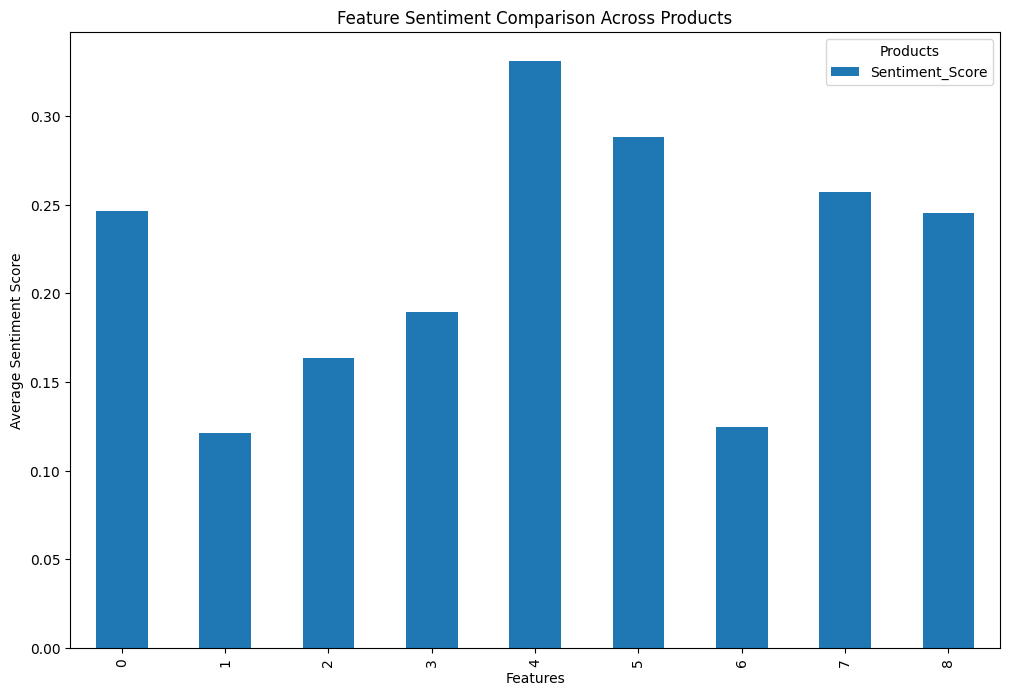

In [102]:
import matplotlib.pyplot as plt

# Plotting feature sentiments for each product
comparison_df.plot(kind="bar", figsize=(12, 8))
plt.title("Feature Sentiment Comparison Across Products")
plt.xlabel("Features")
plt.ylabel("Average Sentiment Score")
plt.legend(title="Products")
plt.show()


## Most Appreciated Features (Top 2):
### Design:
Sentiment Score: 0.3311
This indicates that the overall design and aesthetics of the product were highly appreciated by users.

### Price:
Sentiment Score: 0.2882
Despite being a critical factor, users had a positive sentiment regarding the value for money, indicating satisfaction with the cost.

## Most Criticized Features (Bottom 2):
### Battery Life:
Sentiment Score: 0.1210
The low sentiment score suggests that users were not satisfied with the battery performance, likely due to short battery life or slow charging issues.

### Storage:
Sentiment Score: 0.1247
Users may have expressed concerns about insufficient storage space, lack of expandability, or storage management.


## Regarding the delivery of the product

### Moderately Positive Sentiment:

A sentiment score of 0.2452 indicates that the feedback on delivery is generally positive but not overwhelmingly so. It suggests that customers were somewhat satisfied with the delivery experience, but there may have been mixed reviews.

## Conclusion
By analyzing these reviews, you can gain valuable insights into consumer preferences and pain points, which can ultimately drive better product development.Hope you all had fun doing this simple assignment , Best of luck with your project!
